<a href="https://colab.research.google.com/github/junimo-farmer/ann-classifier/blob/main/fashion_MNIST_ann_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework #1:

Building an Fashion MNIST Classifier

CS 485: Generative AI

Fernando Mantilla

October 9, 2024


# 1.0 Setting Up The Environment

This ANN Classifier will be using the Fashion MNIST Dataset.
Required libraries are installed below.
* **tensorflow** and **keras** for their neural network libraries
* **numpy** to help with the tensors
* **matplotlib** to plot out the images and the results of the ANN

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

## Downloading the Fashion MNIST Dataset from Keras

We download the fashion MNIST dataset, a collection of 60,000 28x28 grayscale images of apparel to train the model with, along with 10,000 test images.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 2.0 Building the ANN

## 2.1 Creating the Layers
We initialize our keras model as sequential, to build the model layer by layer. Each layer is descirbed below:
* Flatten: Flattens the 28x28 image into a 1D array of 784 features
* Dense: Fully connects the 784 features to each of the 128 nodes (with a ReLU Activation)
* Dense: These new 128 values are given to each of the 10 nodes (with softmax to convert to a probability distribution)

The 10 values output correspond to each of the 10 classes (0-9). Softmax is necessary for our model to output a valid probaility distribution.


In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 2.2 Compilation of the ANN


We compile the model, which is the configuration part of the model. We specify the optimizer to be Adam (simply because it is a good default to use).

For the loss, we specify sparse_categorical_crossentropy, which is good for models with more than 2 values for labels.

We choose the metric of accuracy, which is an intuitive way to evaulate the performance of a model whose job it is to classify images.

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3.0 Training the ANN

Now we train the model on the **train_images**, providing it the **train_labels** so that it can evaluate its performance.  It can begin to optimize its parameters in order to minimize the value of loss. It runs this optimization algorithm for 10 **epochs**.

An epoch is a complete pass of the training set with the current parameters. After an epoch has passed, the model will update its parameters and retrain itself. Ideally, the training set will be split into minibatches, which allows for the model to be trained on multiple set of images, and not just one set of all the training images (to prevent overfitting).

In [5]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6763 - loss: 10.7292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7384 - loss: 0.7232
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7791 - loss: 0.6000
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8018 - loss: 0.5349
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8210 - loss: 0.5049
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8288 - loss: 0.5074
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8328 - loss: 0.4857
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8357 - loss: 0.4774
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8426 - loss: 0.4582
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8377 - loss: 0.4682


# 4.0 Evaluation and Testing

We now provide the model with **test_images** and **test_labels**, images that it has not been trained on, to see how our trained (optimized) model performs on unseen data. Our final accuracy is displayed below (which is expressed as a percentage of how many images it can correctly identify).

In [6]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8348 - loss: 0.4939


[0.5140487551689148, 0.8295000195503235]

# 5.0 Displaying the Data

## 5.1 How our model performed for the first 10 images

Now, we want to see the actual output that our model generated when analyzing the test set. Below I have displayed the image that was analyzed, and what the model outputted from the features it found in the image.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Image 0


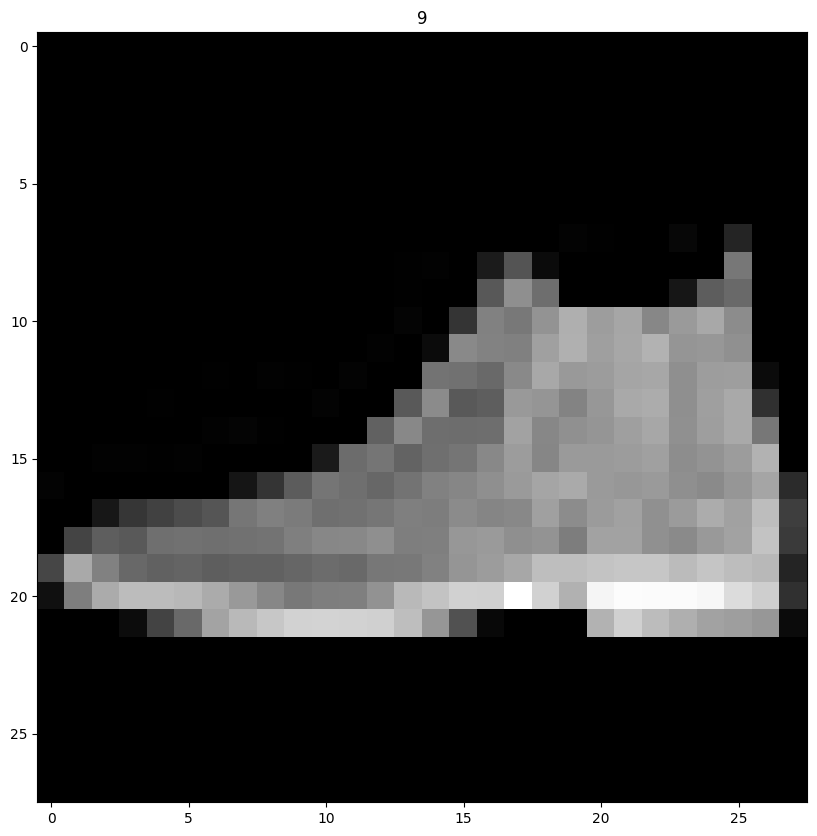

Actual Label: 9
Output Predictions: [7.0116628e-14 4.7080955e-12 0.0000000e+00 5.1911309e-11 4.3773246e-35
 2.8542845e-02 3.7776883e-16 5.0688423e-02 4.4084615e-08 9.2076868e-01]
Predicted Label: 9


Image 1


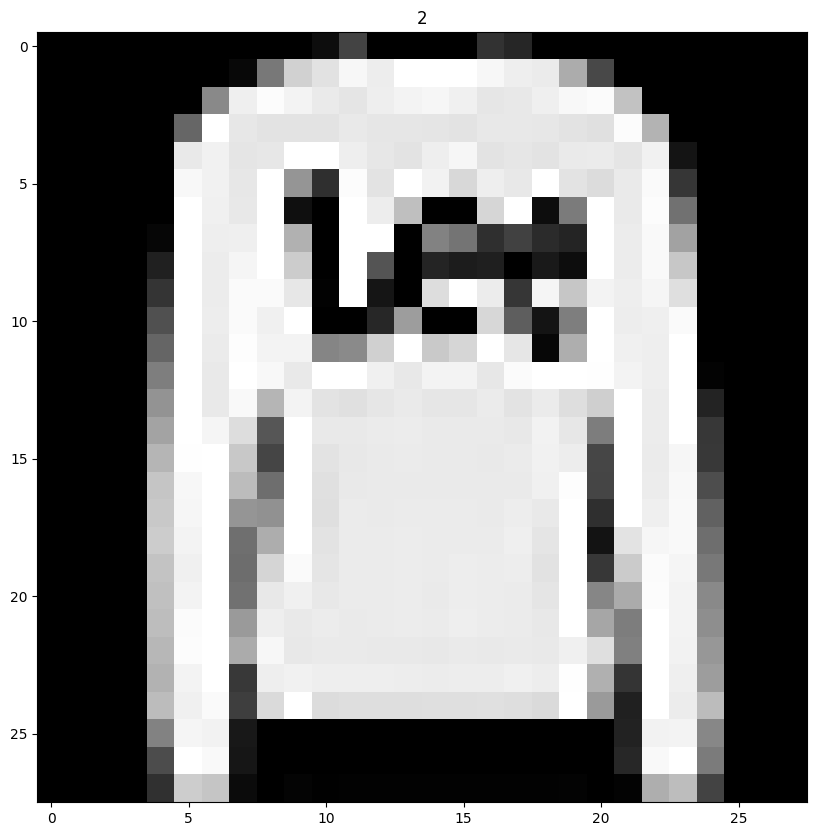

Actual Label: 2
Output Predictions: [1.9486265e-03 1.8932291e-14 9.8675293e-01 4.6294485e-06 7.6131118e-03
 7.6826444e-30 3.6807300e-03 0.0000000e+00 2.0837502e-08 0.0000000e+00]
Predicted Label: 2


Image 2


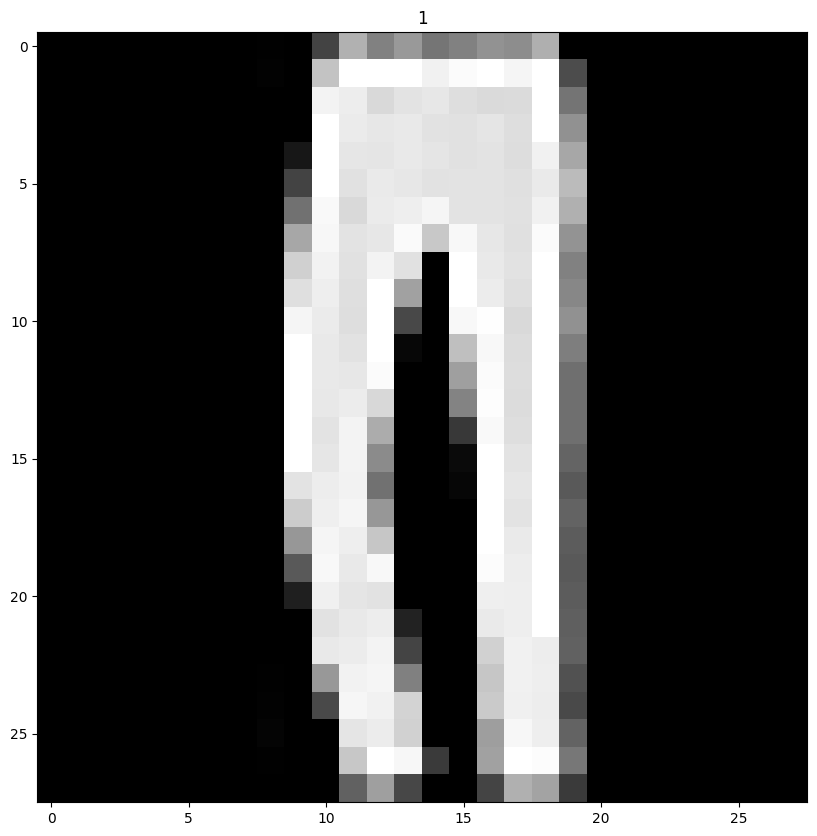

Actual Label: 1
Output Predictions: [1.2612048e-09 9.9997061e-01 2.1496272e-07 3.2438165e-09 2.9162366e-05
 3.0175801e-30 3.6673446e-12 0.0000000e+00 2.2804842e-15 1.6503793e-36]
Predicted Label: 1


Image 3


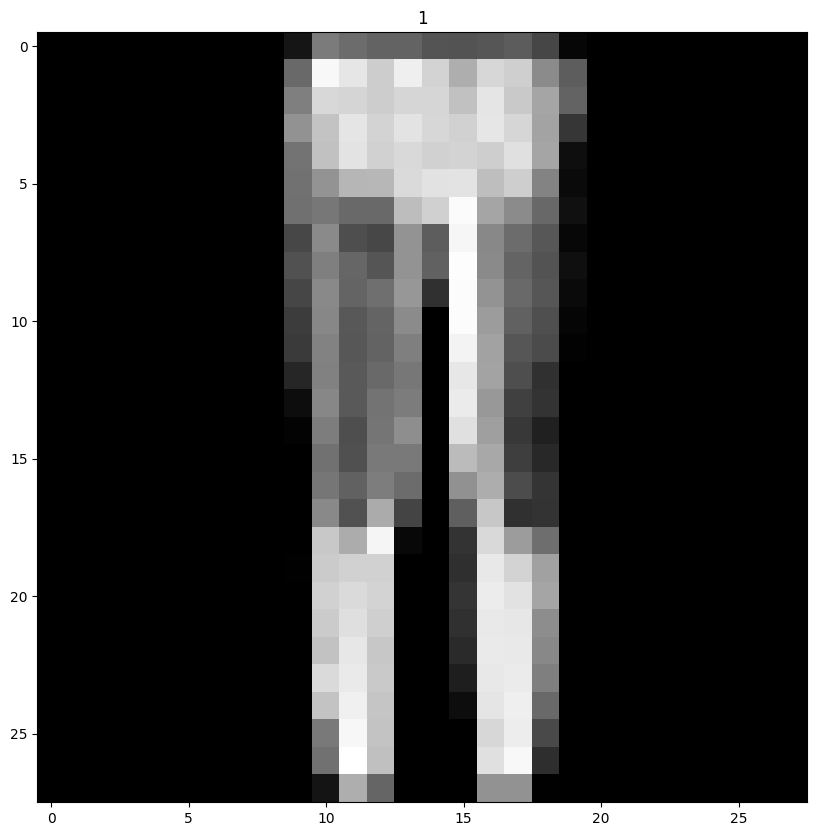

Actual Label: 1
Output Predictions: [4.9528176e-10 9.9991363e-01 7.3482923e-08 3.7701227e-08 8.6246117e-05
 5.6052736e-35 7.0537966e-13 0.0000000e+00 3.3645699e-15 4.1401486e-38]
Predicted Label: 1


Image 4


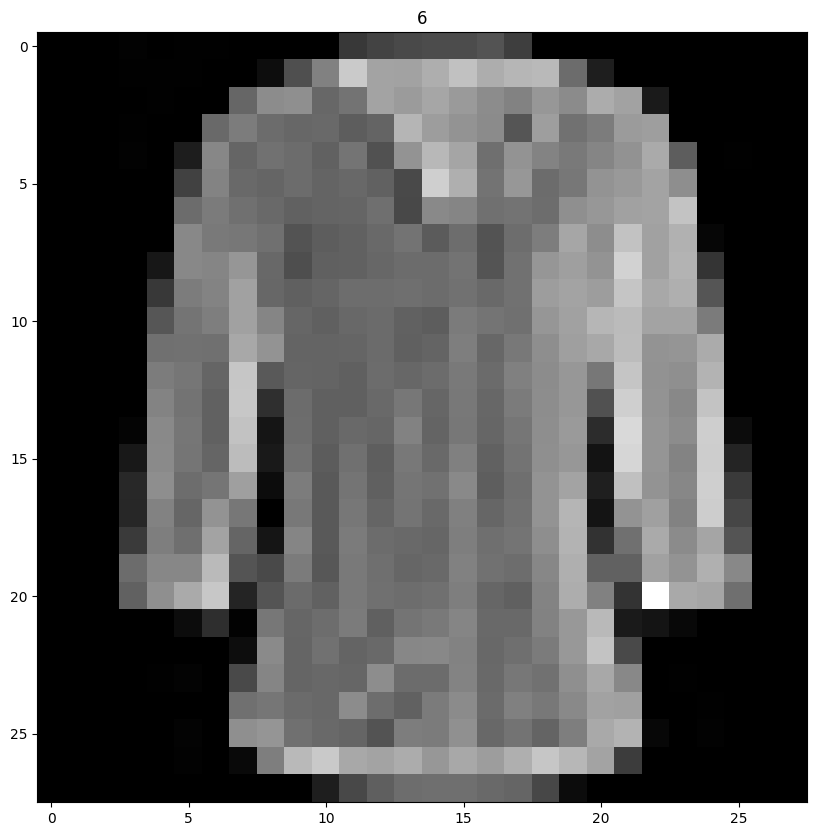

Actual Label: 6
Output Predictions: [6.4670734e-02 3.3315584e-06 8.8416331e-02 9.4040819e-02 4.5725655e-02
 4.0428185e-07 6.8688345e-01 6.8655930e-14 2.0259390e-02 6.9724178e-11]
Predicted Label: 6


Image 5


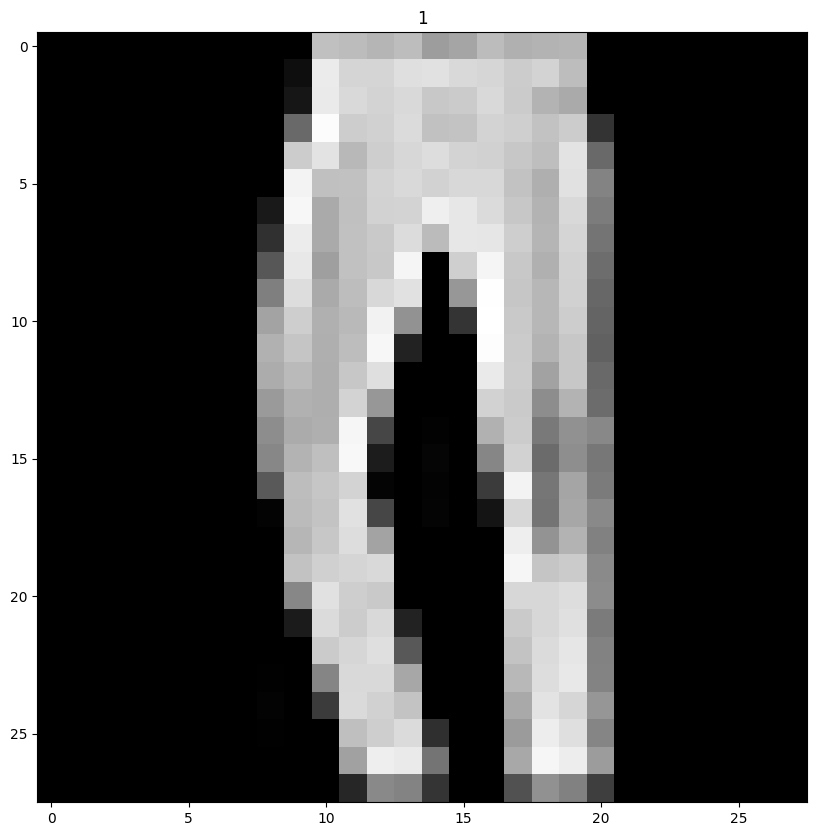

Actual Label: 1
Output Predictions: [1.7185132e-05 9.9991423e-01 1.3621448e-05 1.0153148e-06 5.3714524e-05
 2.4670899e-24 1.3651163e-07 0.0000000e+00 5.8034528e-12 4.0471150e-38]
Predicted Label: 1


Image 6


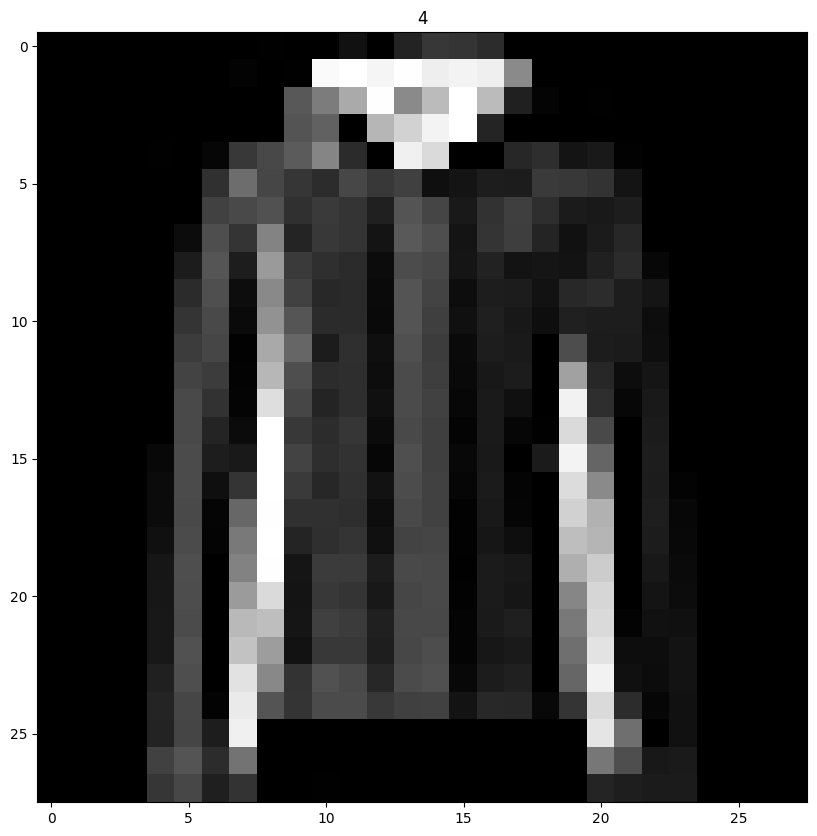

Actual Label: 4
Output Predictions: [3.6102110e-03 8.4169889e-09 1.0591473e-01 4.4521522e-03 8.3727020e-01
 1.0940925e-20 4.8752449e-02 0.0000000e+00 3.0030051e-07 1.0095786e-30]
Predicted Label: 4


Image 7


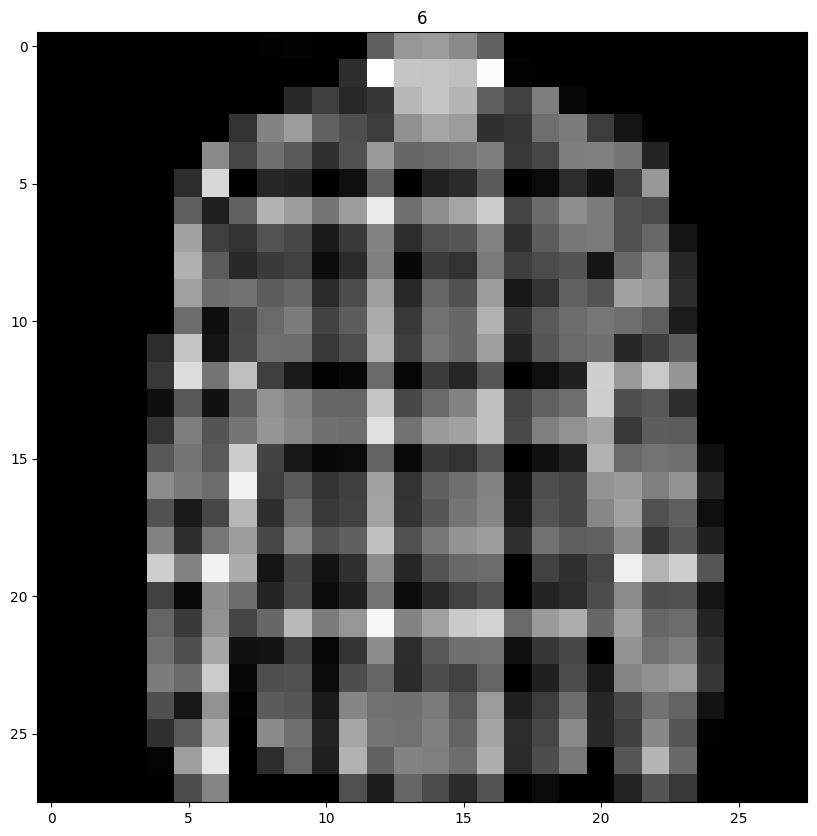

Actual Label: 6
Output Predictions: [2.7305018e-03 3.6977054e-13 4.1372068e-02 3.2586109e-02 1.5934427e-01
 3.6177743e-15 7.6370019e-01 4.3014578e-24 2.6683678e-04 6.2028600e-20]
Predicted Label: 6


Image 8


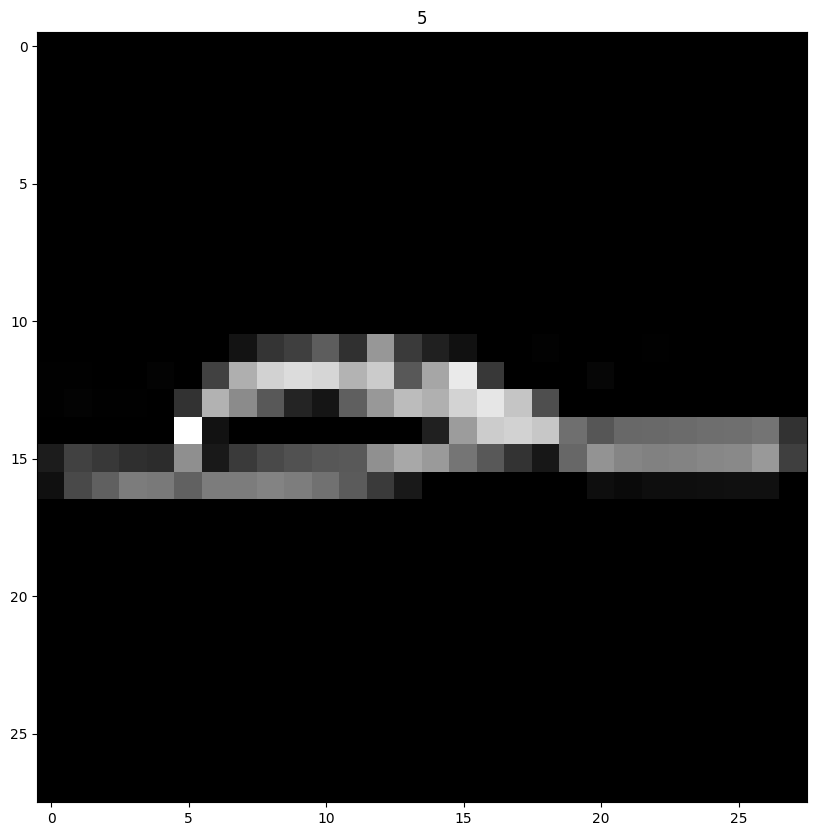

Actual Label: 5
Output Predictions: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.9999815e-01 0.0000000e+00 1.8403251e-06 1.1820392e-17 4.0706769e-10]
Predicted Label: 5


Image 9


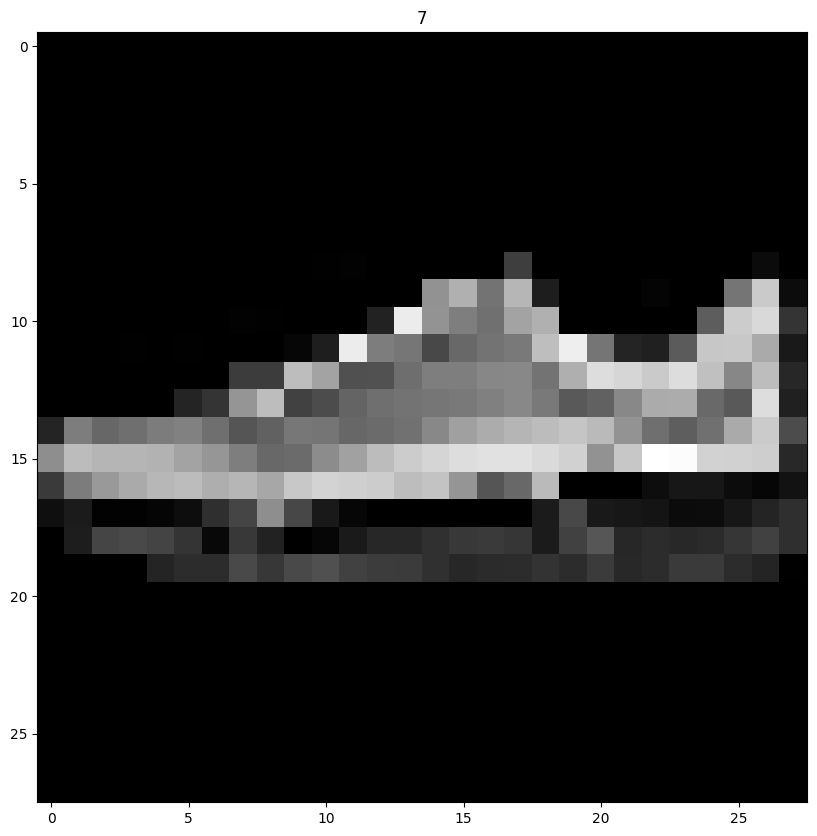

Actual Label: 7
Output Predictions: [8.8339494e-32 4.6618791e-18 1.2374911e-34 3.7482580e-24 0.0000000e+00
 3.6243307e-03 0.0000000e+00 9.9574333e-01 9.7759996e-09 6.3235644e-04]
Predicted Label: 7




In [8]:
output = model.predict(test_images)
for i in range(10):
    plt.figure(figsize=(10,10))
    print("Image", i);
    plt.imshow(test_images[i], cmap='gray')
    plt.title(np.argmax(output[i]))
    plt.show()
    print("Actual Label:", test_labels[i])
    print("Output Predictions:", output[i])
    print("Predicted Label:", np.argmax(output[i]))
    print("\n")


## 5.2 Incorrect Predictions:

Here, we iterate over the first 100 images, and only display the images which were incorrectly identified by the model. As expected the percentage of incorrect predictions approaches 1 - *accuracy* or 1 - 0.83 = 0.17.

  17 incorrect images / 100 total images = 0.17.

Image 17


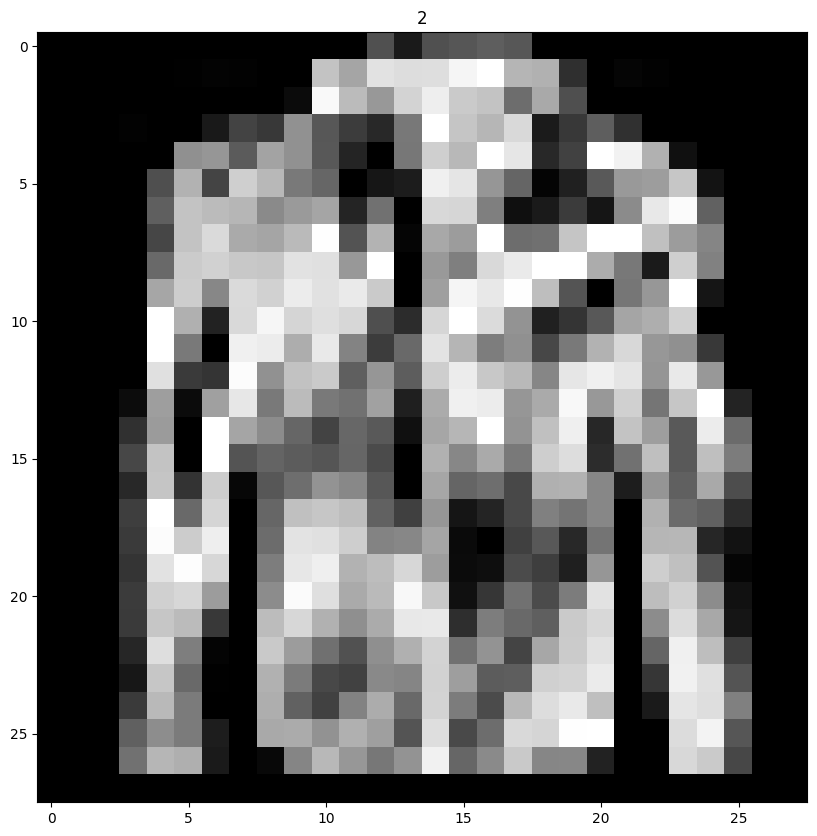

Actual Label: 4
Output Predictions: [1.0265218e-02 1.7529376e-12 6.1396873e-01 2.5594486e-03 1.3307467e-01
 4.0156213e-20 2.4010824e-01 0.0000000e+00 2.3686453e-05 1.9985266e-30]
Predicted Label: 2


Image 21


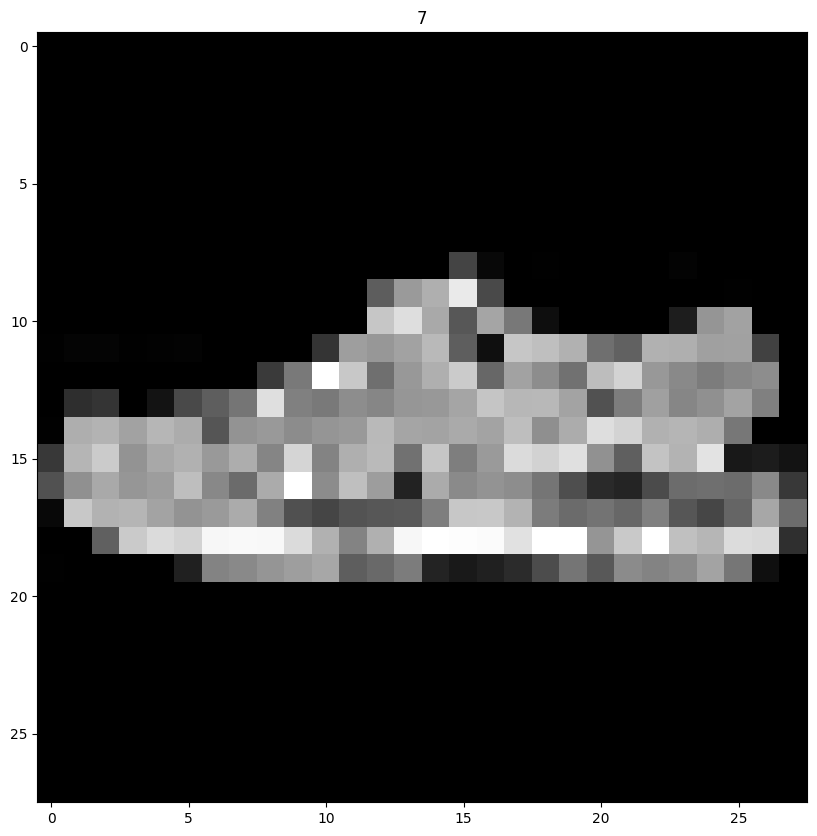

Actual Label: 5
Output Predictions: [4.7955231e-16 1.0943819e-08 2.0377143e-16 4.5082035e-11 3.5235867e-21
 5.7729512e-02 2.2214869e-19 9.0814734e-01 7.1528315e-04 3.3407837e-02]
Predicted Label: 7


Image 23


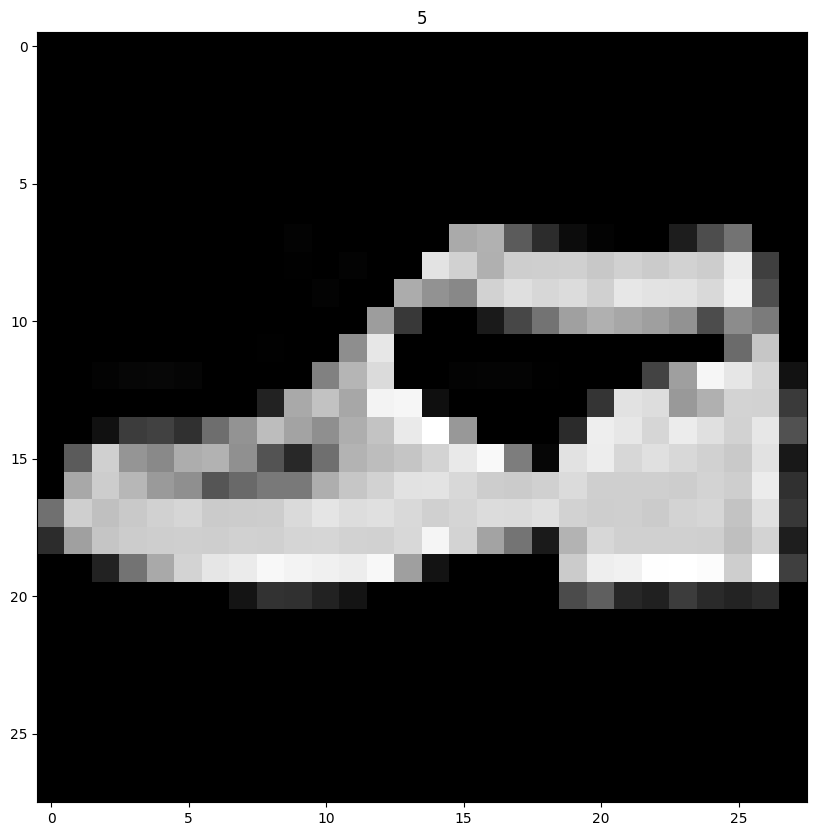

Actual Label: 9
Output Predictions: [1.8949064e-31 0.0000000e+00 0.0000000e+00 1.9123808e-36 0.0000000e+00
 9.8469764e-01 0.0000000e+00 2.4897123e-03 5.5461991e-10 1.2812527e-02]
Predicted Label: 5


Image 25


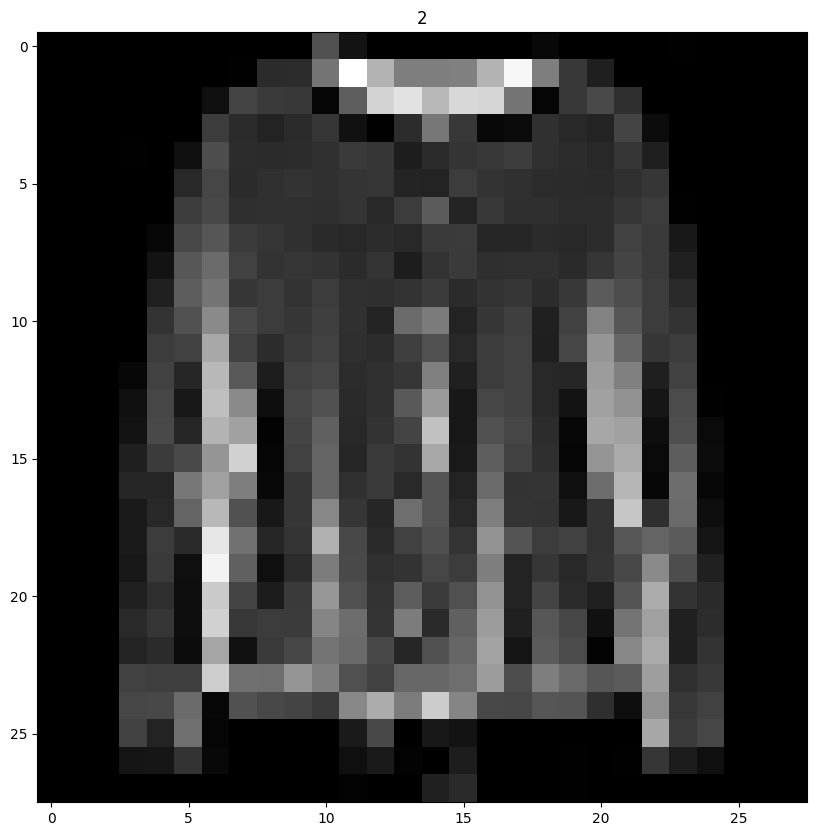

Actual Label: 4
Output Predictions: [4.9833646e-03 1.3028776e-07 8.4618121e-01 3.7520801e-04 1.3942012e-01
 1.0180363e-17 9.0339016e-03 0.0000000e+00 6.1285227e-06 9.9586117e-27]
Predicted Label: 2


Image 40


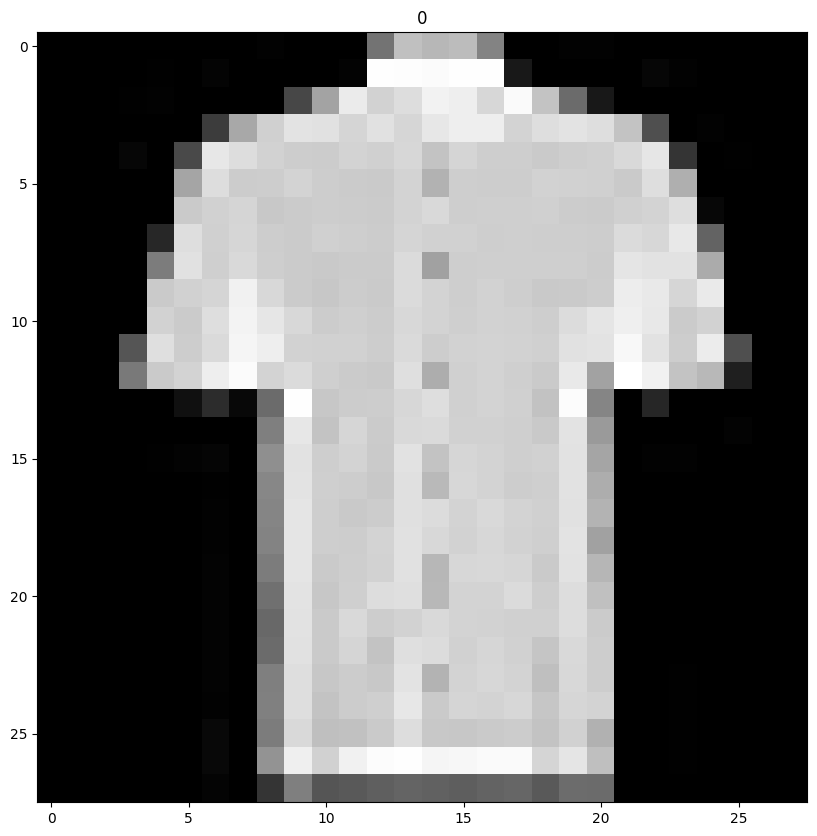

Actual Label: 6
Output Predictions: [8.9264643e-01 7.7975761e-07 1.1464746e-06 7.3140161e-04 7.2095099e-09
 3.6773148e-17 1.0661955e-01 0.0000000e+00 6.7529015e-07 0.0000000e+00]
Predicted Label: 0


Image 42


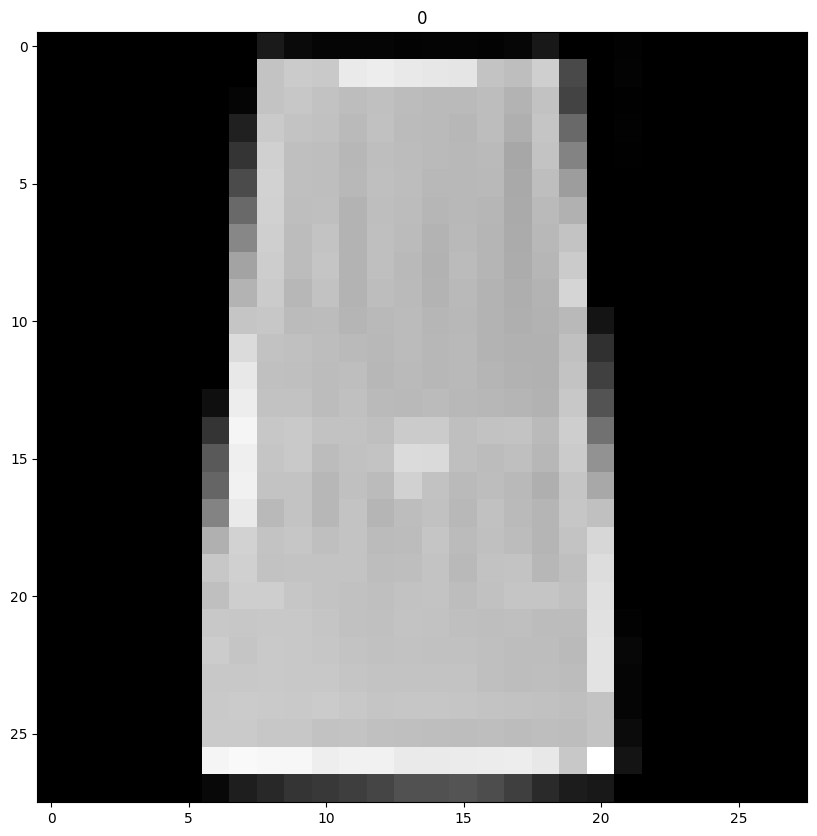

Actual Label: 3
Output Predictions: [5.1329517e-01 5.6132278e-03 6.2308288e-03 2.6233360e-01 1.9535902e-03
 1.8487831e-10 2.0502035e-01 9.0963823e-33 5.5531994e-03 9.2113303e-19]
Predicted Label: 0


Image 49


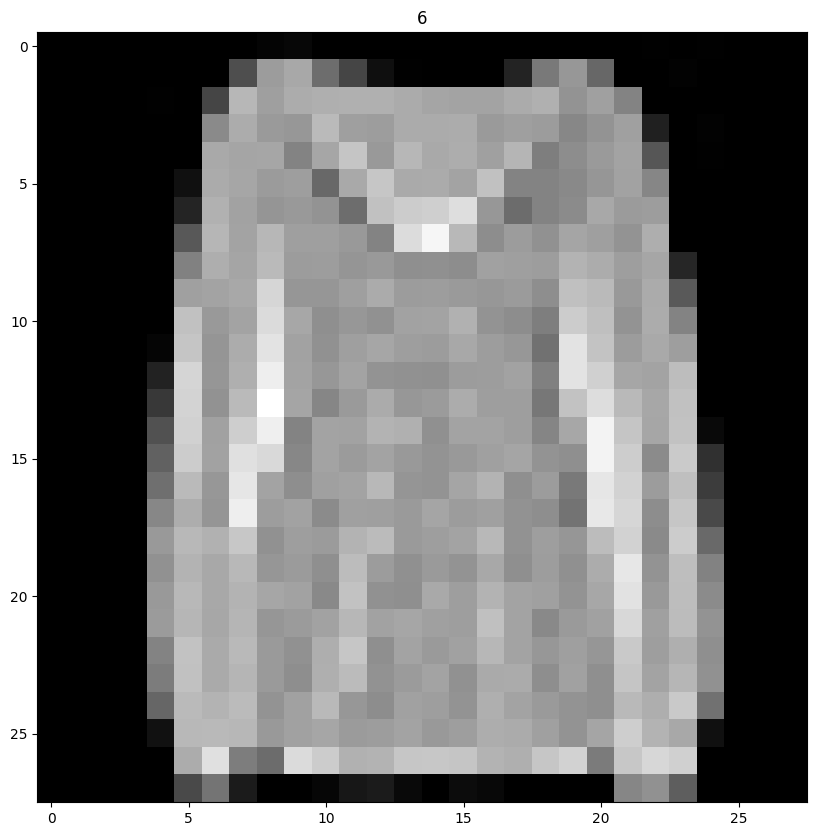

Actual Label: 2
Output Predictions: [3.2499675e-02 6.8134966e-07 1.3229735e-01 9.1519341e-02 1.0822537e-01
 2.5829885e-07 6.1474156e-01 2.7676108e-11 2.0715775e-02 8.6261398e-10]
Predicted Label: 6


Image 50


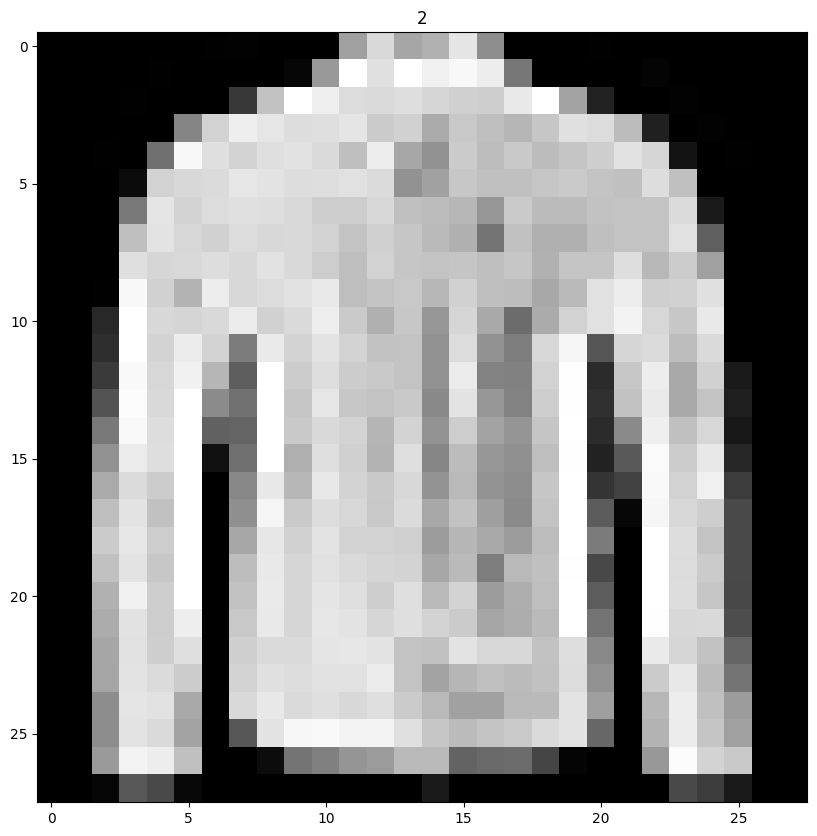

Actual Label: 4
Output Predictions: [1.5701754e-02 4.1602881e-11 6.2440652e-01 3.7665239e-03 1.1783742e-01
 5.9566227e-18 2.3821345e-01 0.0000000e+00 7.4325821e-05 2.6465627e-27]
Predicted Label: 2


Image 51


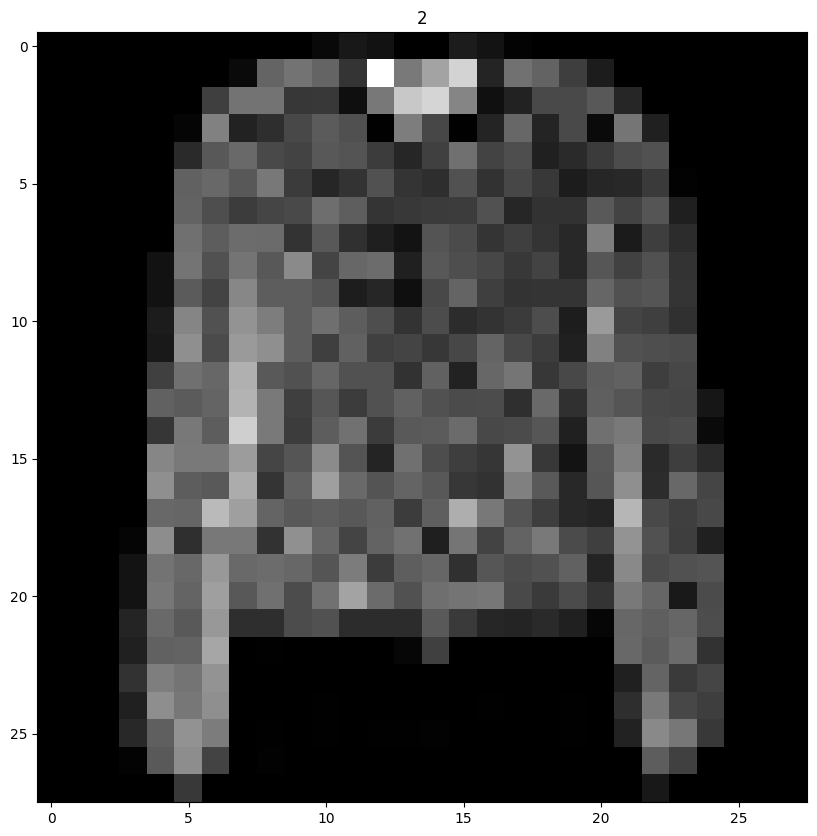

Actual Label: 4
Output Predictions: [3.1831387e-02 1.0785690e-08 4.6403730e-01 1.5442233e-02 1.2155574e-01
 5.4437905e-13 3.6598334e-01 0.0000000e+00 1.1499110e-03 1.5440686e-19]
Predicted Label: 2


Image 53


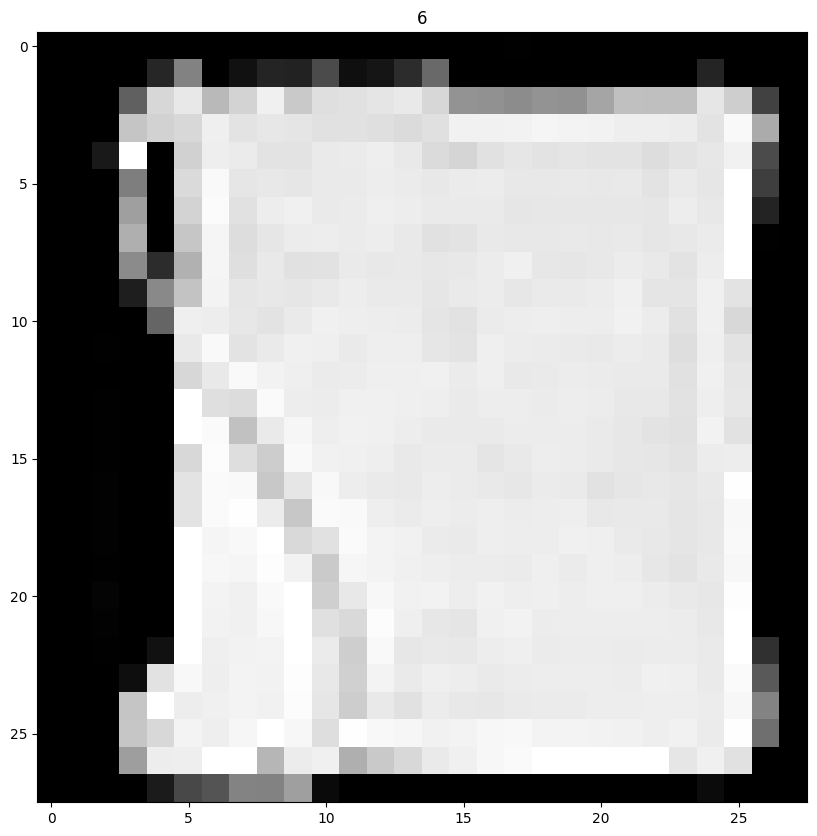

Actual Label: 8
Output Predictions: [0.09519737 0.01345572 0.14695705 0.09237866 0.03833301 0.07575148
 0.24681072 0.03671123 0.2420395  0.01236525]
Predicted Label: 6


Image 57


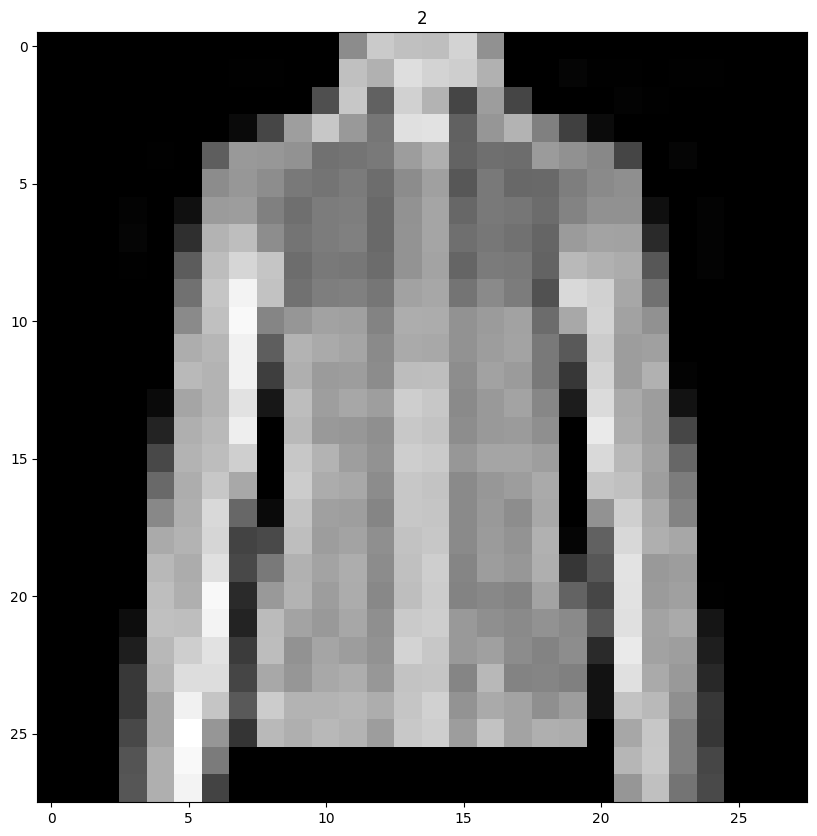

Actual Label: 4
Output Predictions: [6.9412622e-03 1.1421246e-13 4.8246488e-01 3.0811769e-03 1.7613387e-01
 3.4691745e-21 3.3136407e-01 0.0000000e+00 1.4821580e-05 1.6454914e-31]
Predicted Label: 2


Image 66


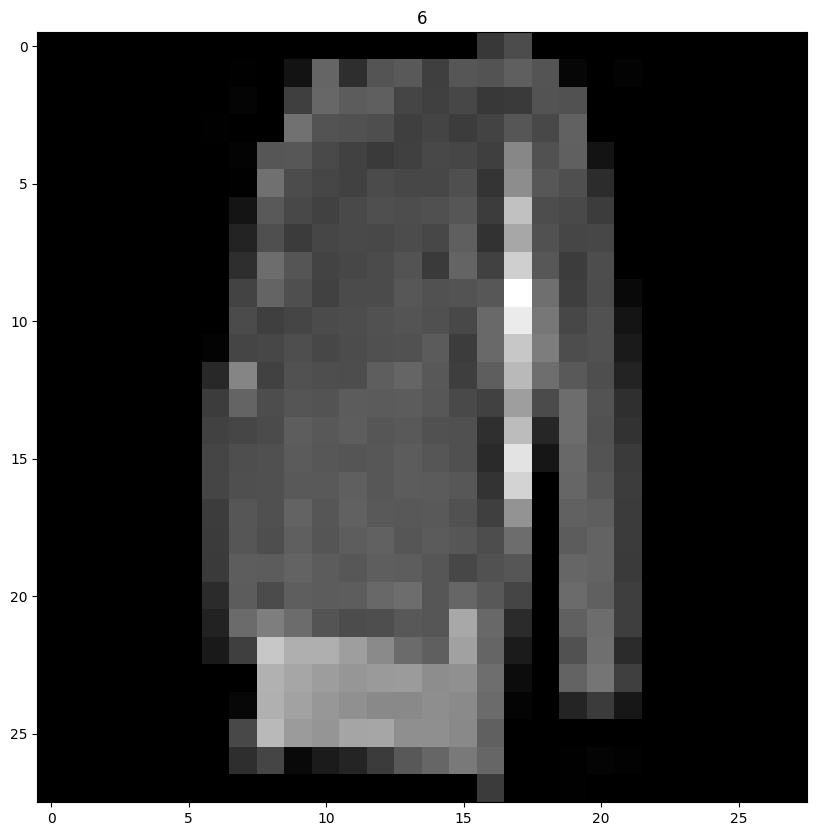

Actual Label: 2
Output Predictions: [1.5743686e-01 9.2020314e-03 2.3381890e-01 8.3370812e-02 4.1237712e-02
 4.1024205e-03 3.1476513e-01 2.7452330e-11 1.5604086e-01 2.5340687e-05]
Predicted Label: 6


Image 68


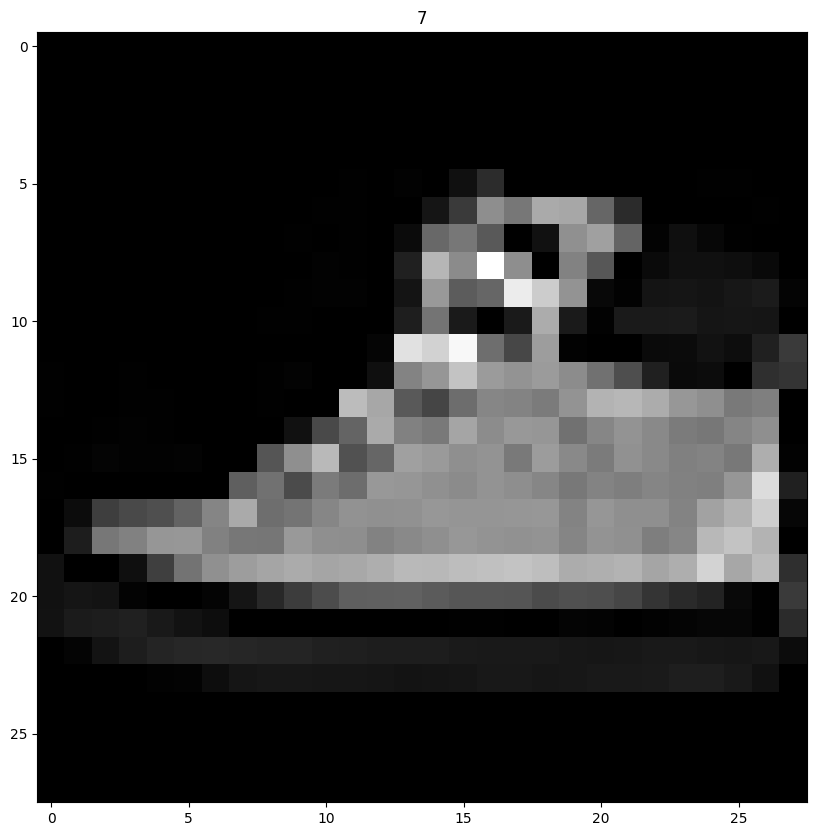

Actual Label: 9
Output Predictions: [1.0020930e-34 1.4183798e-17 9.1369381e-36 8.3723362e-24 0.0000000e+00
 9.9670282e-04 0.0000000e+00 9.9639255e-01 1.6395521e-08 2.6107002e-03]
Predicted Label: 7


Image 72


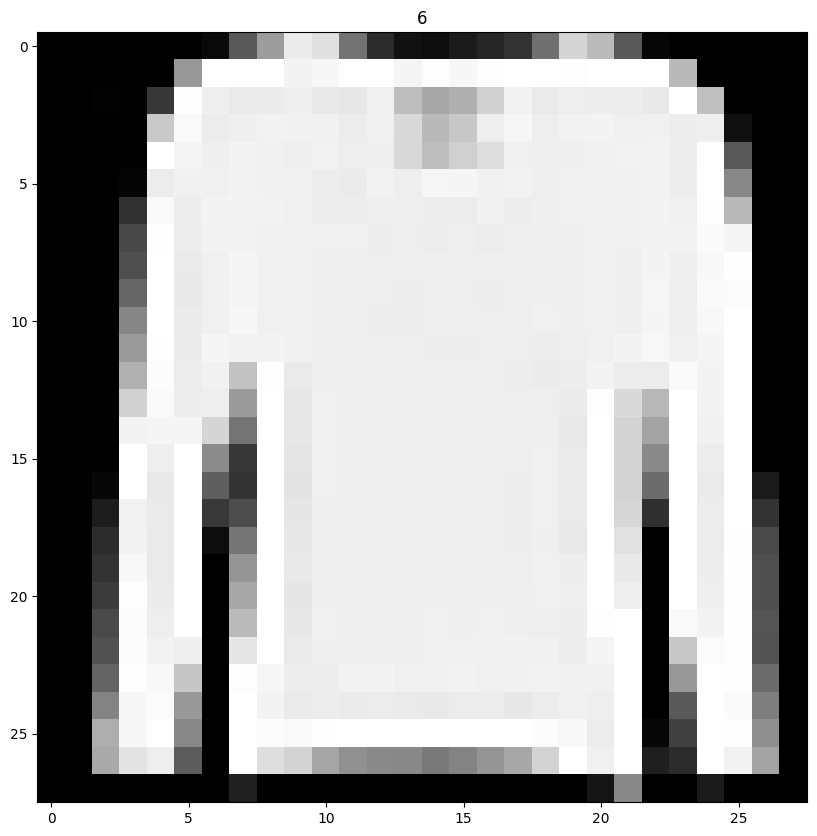

Actual Label: 2
Output Predictions: [0.09519737 0.01345572 0.14695705 0.09237866 0.03833301 0.07575148
 0.24681072 0.03671123 0.2420395  0.01236525]
Predicted Label: 6


Image 89


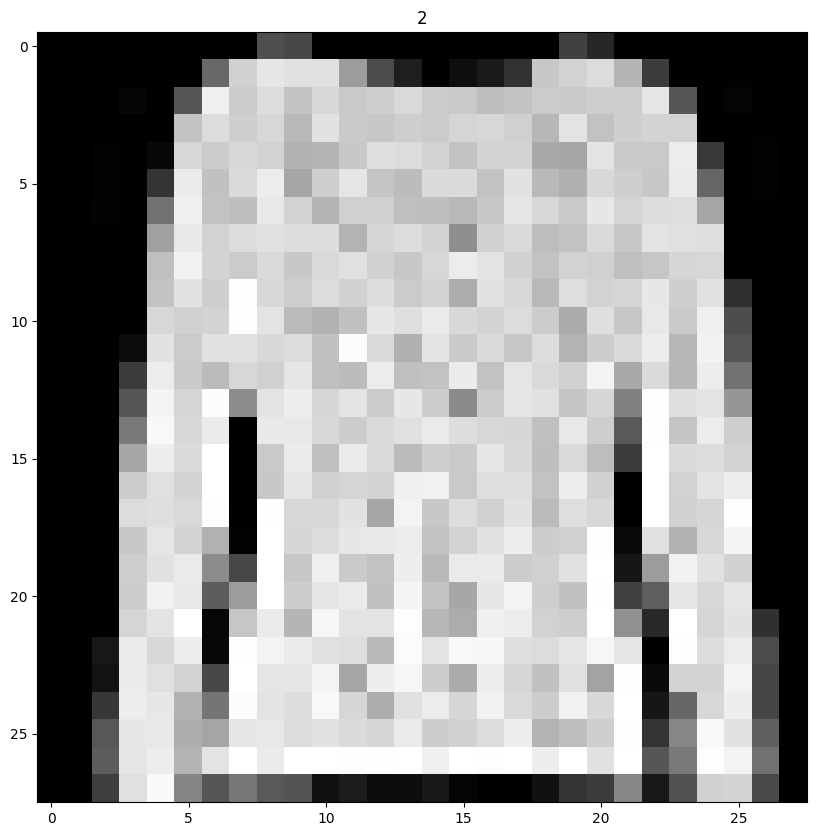

Actual Label: 6
Output Predictions: [1.45001352e-01 5.81029896e-03 3.79178554e-01 5.63965589e-02
 5.28136417e-02 5.95352263e-04 2.54401565e-01 9.08841537e-18
 1.05800994e-01 1.56978626e-06]
Predicted Label: 2


Image 91


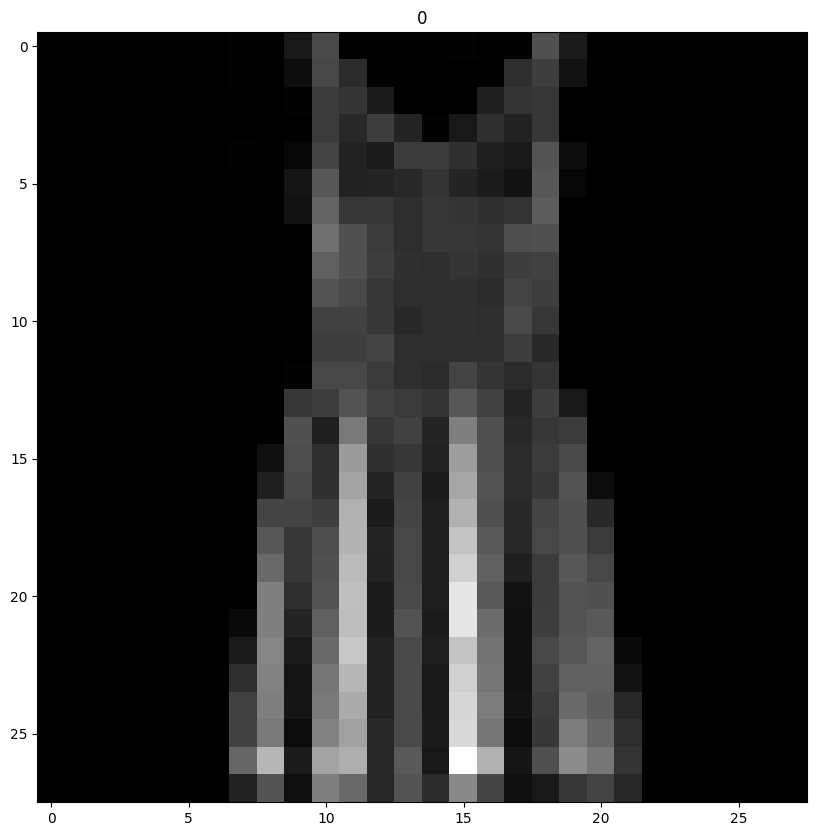

Actual Label: 3
Output Predictions: [4.27984834e-01 3.89467478e-02 1.08737601e-02 4.07432139e-01
 7.55241094e-03 4.74245990e-12 1.04384266e-01 4.40277440e-37
 2.82575726e-03 9.87702765e-20]
Predicted Label: 0


Image 98


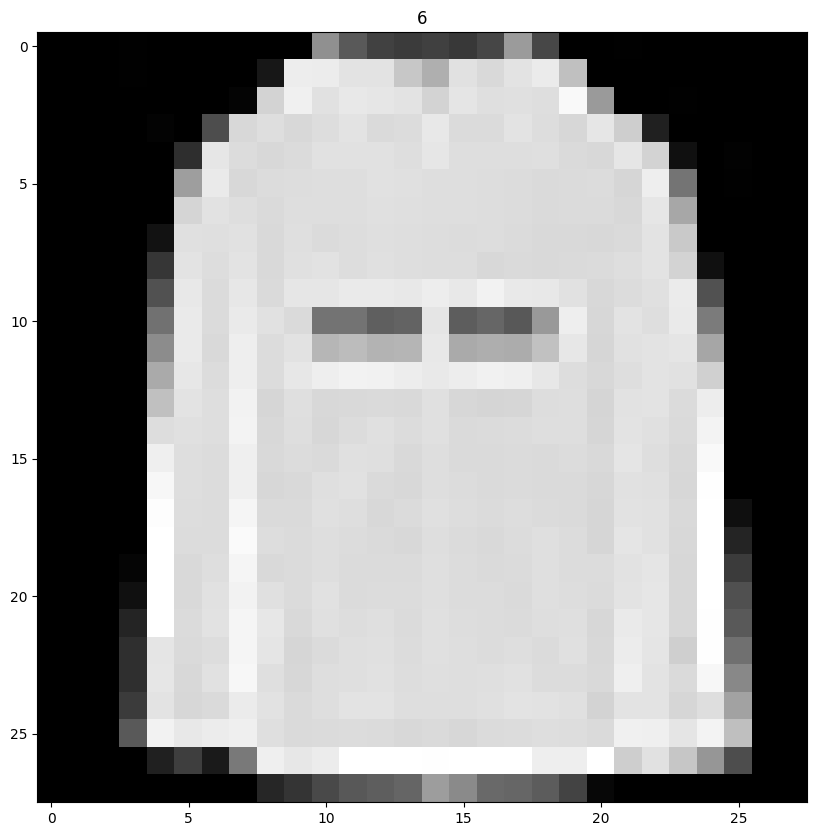

Actual Label: 4
Output Predictions: [1.7788533e-02 1.6860595e-08 1.0179196e-01 7.2824903e-02 1.2440498e-01
 2.4779085e-09 6.7621469e-01 1.3810186e-14 6.9748377e-03 2.1111691e-12]
Predicted Label: 6


Number of Incorrect Predictions over first 100 test images: 17


In [10]:
count = 0;
for i in range(100):
    if(np.argmax(output[i]) != test_labels[i]):
      count += 1;
      plt.figure(figsize=(10,10))
      print("Image", i);
      plt.imshow(test_images[i], cmap='gray')
      plt.title(np.argmax(output[i]))
      plt.show()
      print("Actual Label:", test_labels[i])
      print("Output Predictions:", output[i])
      print("Predicted Label:", np.argmax(output[i]))
      print("\n")
print("Number of Incorrect Predictions over first 100 test images:", count);

# 6.0 References

[Tensorflow Frontpage](https://www.tensorflow.org/)

[Keras Documentation](https://keras.io/about/)

[ChatGPT: About the number of nodes/layers to use and the optimizers](https://chatgpt.com/share/6706ba02-b0e4-8004-9028-e7b431074efa)